Lab2 Group Members: (Rupak Seal, RS7502), (Aadi Joshi ,aj1566), (Jose Velazquez,jav4534)

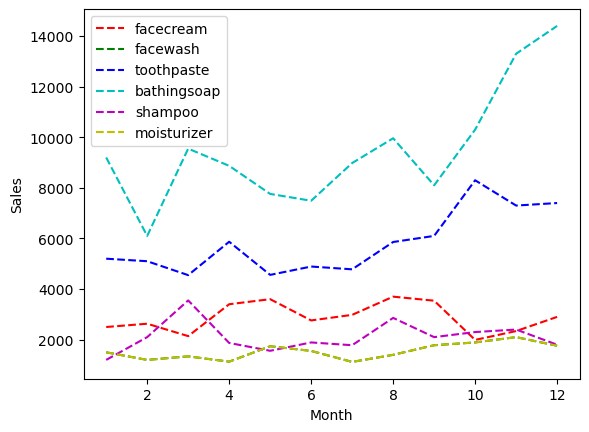

In [9]:
#1) Please read about the following Python libraries.
#a) Download the product sales data from the below link:
#https://drive.google.com/file/d/19Xu297MPLVFTR2VuvDLUPRi3o36ijqW6/view?usp=sharing
#Using Matplotlib library, plot the sales of each product for whole year (Y axis- Sales and X axis- Month). 
#Use Dashed line for plot and different colors for each product.
import os, sys
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('product_sales_Data.csv')
months = data['month_number']
facecream_sales = data['facecream']
facewash_sales = data['facewash']
toothpaste_sales = data['toothpaste']
bathingsoap_sales = data['bathingsoap']
shampoo_sales = data['shampoo']
moisturizer_sales = data['moisturizer']
plt.plot(months, facecream_sales, 'r--', label='facecream')  # 'r--' specifies red dashed line
plt.plot(months, facewash_sales, 'g--', label='facewash')  # 'g--' specifies green dashed line
plt.plot(months, toothpaste_sales, 'b--', label='toothpaste')  # 'g--' specifies green dashed line
plt.plot(months, bathingsoap_sales, 'c--', label='bathingsoap')  # 'g--' specifies green dashed line
plt.plot(months, shampoo_sales, 'm--', label='shampoo')  # 'g--' specifies green dashed line
plt.plot(months, moisturizer_sales, 'y--', label='moisturizer')  # 'g--' specifies green dashed line
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [13]:
#b) Using Math library calculate the following:
import math
## • Ceiling of 435/6.
ceiling = math.ceil(435/6)
print("Ceiling of 435/6:", ceiling)
## • Floor of 2667/8.
floor = math.floor(2667/8)
print("Floor of 2667/8:", floor)
## • Factorial of 25.
factorial = math.factorial(25)
print("Factorial of 25:", factorial)
## • Sum of the elements of array:
##[0.2, 0.33, 0.12, 0.57, 341.1, 23.77, 11.919, 9.1, 10.4, 4.4]
array = [0.2, 0.33, 0.12, 0.57, 341.1, 23.77, 11.919, 9.1, 10.4, 4.4]
array_sum = sum(array)
print("Sum of array elements:", array_sum)

Ceiling of 435/6: 73
Floor of 2667/8: 333
Factorial of 25: 15511210043330985984000000
Sum of array elements: 401.909


In [14]:
#c) Use time library to find what time following tuple represents:
#t = (2007, 8, 10, 14, 20, 6, 7, 258, 0)
import time

t = (2007, 8, 10, 14, 20, 6, 7, 258, 0)
timestamp = time.mktime(t)
time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(timestamp))

print("Time represented by the tuple:", time)

Time represented by the tuple: 2007-08-10 15:20:06


In [ ]:
#d) What is socket library in Python? Why is it used? Give one brief example.


In [ ]:
#e) What is multithreading?
#Using Threading library, write a Python program to calculate the factorial of number 21 and square root of number 91

In [ ]:
# 2) Please answer the following:
## a) Come up with three differences between symmetric and asymmetric encryption. 
####  Which one do you think is better? 
#### Explain why you think one is better than the other in a few sentences.
## b) Is AES 256 symmetric or asymmetric?


In [ ]:
# 3) Pydantic is a helpful library for data parsing and validation. 
# It coerces input types to the declared type (using type hints),
# accumulates all the errors using ValidationError & it’s also well documented, making it easily discoverable.
## a) Go over the documentation and try understanding how to use this library's methods.
#### Link 1
#### Link 2
## c) Go over pydantic.py, which has classes written in pydantic, and a write up of what each class does and how pydantic is used.
#### Pydantic.py


In [4]:
# 4) Cerberus provides powerful yet simple and lightweight data validation functionality 
# out of the box and is designed to be easily extensible, allowing for custom validation. 
# It’s very similar to Pydantic and you go over the documentations here. It’s like Pydantic with slight variations.
## a) Go over this article and modify the code in the given article to add extra validations to the given schema. 
#### Mind you that you can add extra key value pairs to the dictionary itself and then add validations for those.
## b) Write your modifications.